# Fraud detection for credit card

Solution: Fraud detection is one of the most important problem in banking sector and financial organization which contributes in detecting and classifying inherent fraudulent transactions and eliminate liquidity risk

This project applied Machine learning algorithms to predict fraudulent transactions for credit cards of clients (Binary problem = Fraud/ Non-fraud)

Requirement: Based on attributes of client to classify these transactions into 2 groups 0| Non-fraud - 1| Fraud

Dataset:
- Data source: Kaggle 
- 284.807 transactions with 492 transactions that are labeled fraud tag
- 31 attributes. Due to confidentiality reason, 28 attributes are encrypted by PCA. Only "Time" and "Amount" are provided with raw data
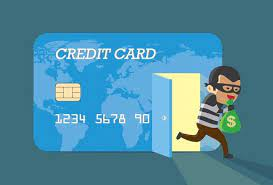

In [1]:
#Import libraries
!pip install imblearn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


Data collection

In [2]:
#Import data
df=pd.read_csv('D:\Vcreme\Data science\Project\Fraud Detection\Data\creditcard.csv')

1. Data exploration

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Data type investigation
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284804 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284805 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Data description
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848040e+05,2.848070e+05,2.848070e+05,2.848060e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-5.272497e-07,8.316234e-13,1.592013e-13,-3.892579e-07,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516261e+00,1.415869e+00,1.380247e+00,1.332273e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903727e-01,-8.486401e-01,-6.915971e-01,-7.682958e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798484e-01,-1.984653e-02,-5.433583e-02,-2.741872e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027193e+00,7.433413e-01,6.119264e-01,3.985671e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Missing value investigation
df.isnull().sum()

Time      0
V1        0
V2        0
V3        3
V4        0
V5        0
V6        1
V7        0
V8        0
V9        0
V10       0
V11       0
V12       2
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Replace missing value by interpolate value
data= df.interpolate()

In [9]:
# Missing value checking after replacement
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Amount details for Fraudulent Transaction
fraud=data[data.Class==1]
fraud.Class.describe()

count    492.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Class, dtype: float64

In [11]:
# Amount details for Non-fraudulent Transaction
nonFraud=data[data.Class==0]
nonFraud.Class.describe()

count    284315.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Class, dtype: float64

In [12]:
#Imlanced in the data 

n1=len(fraud['Class'])
n2=len(nonFraud['Class'])
fraud_percent = (n1 / (n1+n2)) * 100

print("Number of Non-fraud transactions: ", n1)
print("Number of Fraud transactions: ", n2)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Non-fraud transactions:  492
Number of Fraud transactions:  284315
Percentage of Fraud transactions: 0.1727


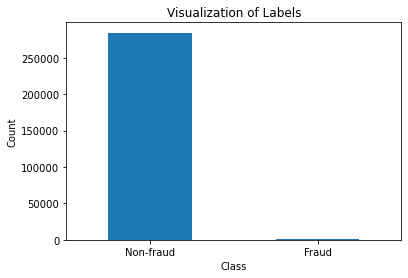

In [13]:
# Plot Fraud và Non-fraud data

labels = ["Non-fraud", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [14]:
# Drop column Time

data.drop('Time',axis='columns')
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


## 2. Data visualization

In [15]:
# Function to visualize scatter plot

def plot_data(X: np.ndarray, y: np.ndarray):
    '''
    Function to visualize scatter plot
    Input: two datasets that need to visualize
    Output: Scatter plot
    '''
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

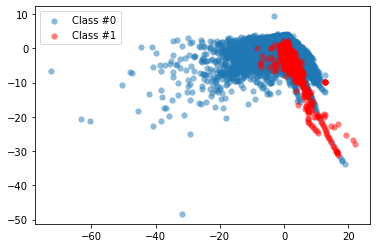

In [16]:
# Vẽ biểu đồ với hai tập Fraud và NonFraud

X=data.iloc[:,2:30].values
Y=data.Class.values
plot_data(X,Y)

In [17]:
# "Amount" variable description
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

[    0.       0.       0.   ... 18910.   19656.53 25691.16]


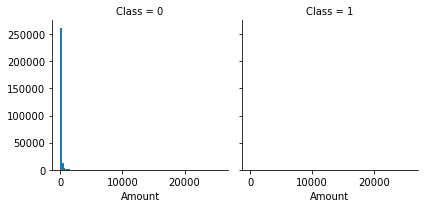

In [18]:
# Histogram chart
df1=df.copy()
Amt = df1.loc[:,'Amount']
Amt=Amt.T
Amt = np.sort(Amt)
print(Amt)
g = sns.FacetGrid(df1, col='Class')
g.map(plt.hist, 'Amount', bins=100)

In [19]:
n=2
df1['AmountBand'] = pd.cut(df1['Amount'], n)


df1[['AmountBand', 'Class']].groupby(['AmountBand'], as_index=False).mean().sort_values(by='AmountBand', ascending=True)

,AmountBand,Class
0,"(-25.691, 12845.58]",0.001728
1,"(12845.58, 25691.16]",0.000000


In [20]:
# Chia biến Amount theo khoảng
df1.loc[ (df1['Amount'] >= 0) & (df1['Amount'] <= 12845.58), 'Amount'] = 1
df1.loc[(df1['Amount'] > 12845.58) & (df1['Amount'] <= 25691.16), 'Amount'] = 2

df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AmountBand
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.0,0,"(-25.691, 12845.58]"
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.0,0,"(-25.691, 12845.58]"
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.0,0,"(-25.691, 12845.58]"
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.0,0,"(-25.691, 12845.58]"
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,1.0,0,"(-25.691, 12845.58]"


# 3. Data preparation

In [21]:
# 1.1) Tách tập Train và Test với tỷ lể 80-20
# Tập features input (Independent variables):    X=data.iloc[:,2:30].values
# Tập output (Dependent variables):              Y=data.Class.values

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.2, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (227845, 28)
Shape of test_X:  (56962, 28)


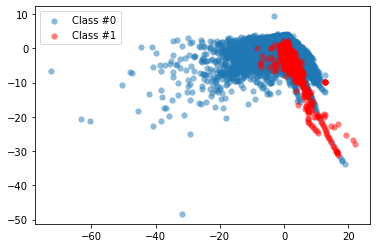

In [22]:
# 1.2) Plot the sample data

plot_data(X,Y)

# 4. Train and Evaluate Model

In [23]:
#Function to calculate evaluate metric of Decision Tree and Random Forest
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

# 4.1.  Decision Trees Algorithm

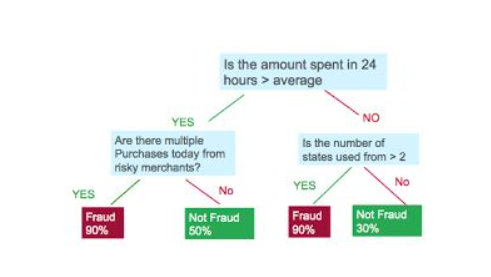



In [24]:
# Training model Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)


predictions_dt = decision_tree.predict(test_X)


decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.92275552122467


In [25]:
#Evaluate Confusion matrix
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())

print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[56843    21]
 [   23    75]]


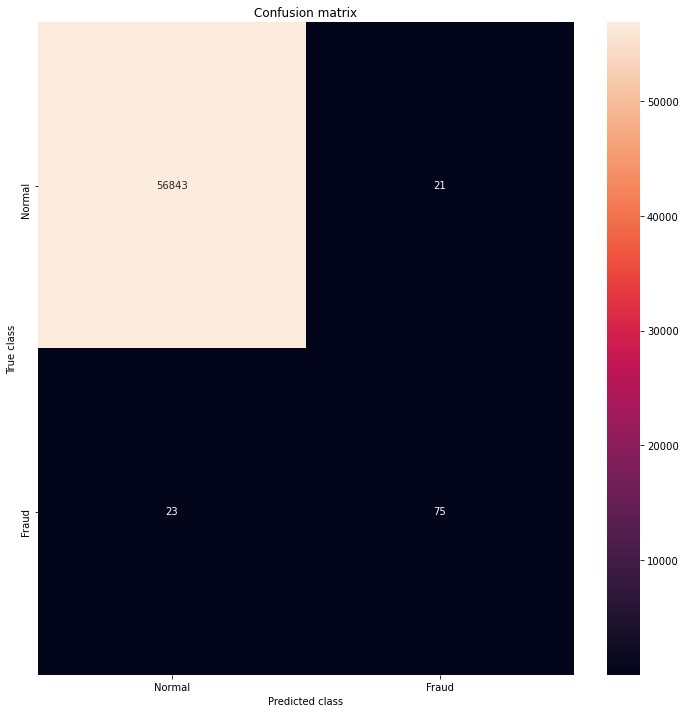

In [26]:
# Plot confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize =(12, 12))
sns.heatmap(confusion_matrix_dt, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [27]:
# Metrics
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99923
Precision: 0.78125
Recall: 0.76531
F1-score: 0.77320


# 4.2. Random Forest algorithm

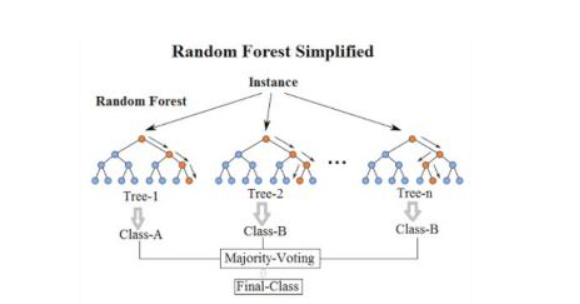



In [28]:
# Training Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.96137776061234


In [29]:
# Evaluate Confusion matrix
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())

print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[56863     1]
 [   21    77]]


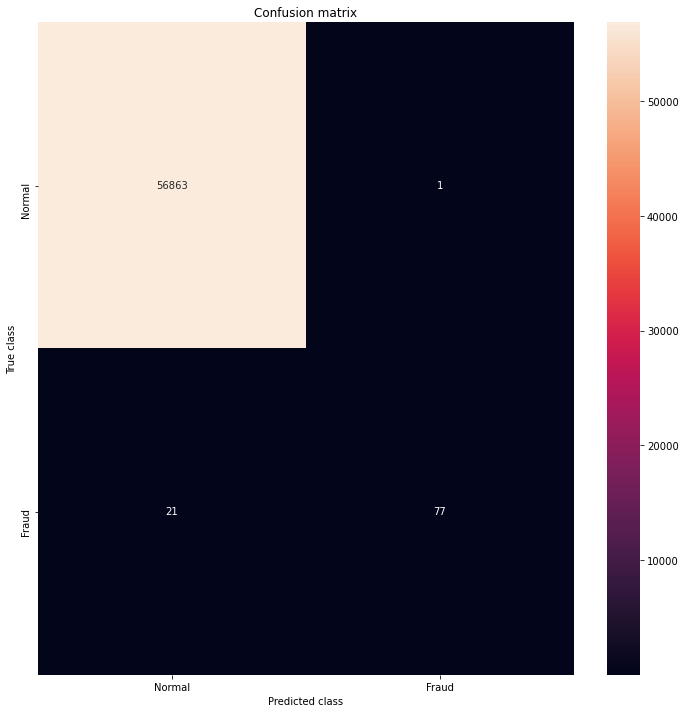

In [30]:
#  Plot confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize =(12, 12))
sns.heatmap(confusion_matrix_rf, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [32]:
# Metrics
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99961
Precision: 0.98718
Recall: 0.78571
F1-score: 0.87500


# 4.3. LogisticRegression



In [34]:
# Training model Logistic Regression
logreg = LogisticRegression()
logreg.fit(train_X, train_Y)

predictions_lg=logreg.predict(test_X)

lg_score = logreg.score(test_X, test_Y) * 100
print("Logistic regression Score: ", lg_score)

Logistic regression Score:  99.90871107053826


C:\Users\An Viet Computer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Evaluate Confusion matrix
confusion_matrix_lg = confusion_matrix(test_Y, predictions_lg.round())

print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lg)

Confusion Matrix - Logistic Regression
[[56853    11]
 [   41    57]]


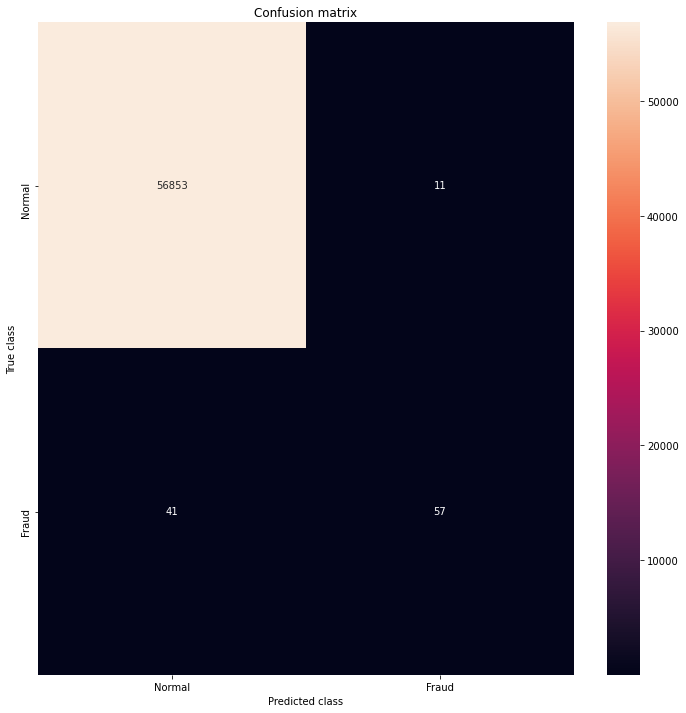

In [36]:
#Plot confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize =(12, 12))
sns.heatmap(confusion_matrix_lg, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [37]:
# Metrics
print("Evaluation of Logistic Regression Model")
print()
metrics(test_Y, predictions_lg.round())

Evaluation of Logistic Regression Model

Accuracy: 0.99909
Precision: 0.83824
Recall: 0.58163
F1-score: 0.68675


# 4.4. KNN

In [38]:
# Training model KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='ball_tree',n_neighbors = 3)
knn.fit(train_X, train_Y)


predictions_knn = knn.predict(test_X)
print('Kết quả dự đoán: ')
predictions_knn


knn_score = knn.score(test_X, test_Y) * 100
print("Random Forest Score: ", knn_score)

Kết quả dự đoán: 
Random Forest Score:  99.9420666409185


In [39]:
# Evaluate Confusion matrix
confusion_matrix_knn = confusion_matrix(test_Y, predictions_knn.round())

print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_knn)

Confusion Matrix - Logistic Regression
[[56862     2]
 [   31    67]]


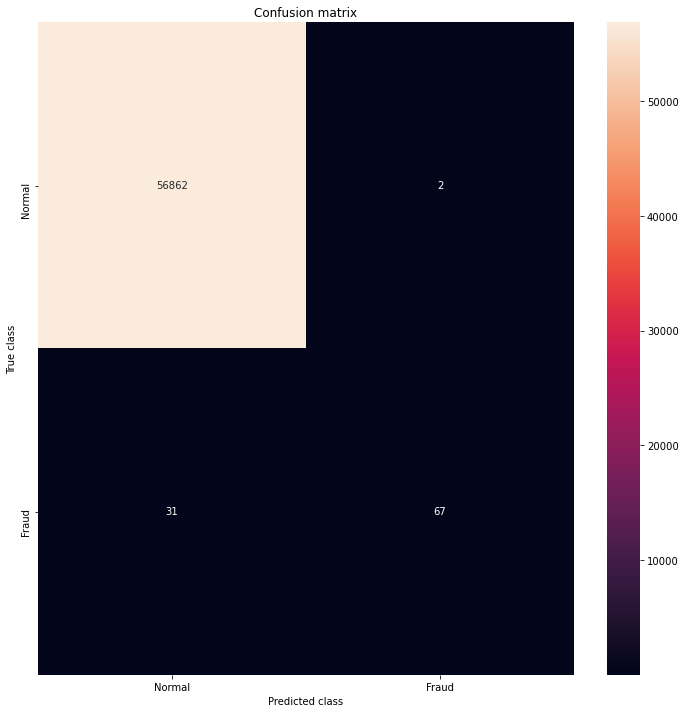

In [40]:
#Plot confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize =(12, 12))
sns.heatmap(confusion_matrix_knn, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [41]:
# Metrics
print("Evaluation of KNN Model")
print()
metrics(test_Y, predictions_knn.round())

Evaluation of KNN Model

Accuracy: 0.99942
Precision: 0.97101
Recall: 0.68367
F1-score: 0.80240


# 4.5. SVM

In [42]:
#Huấn luyện mô hình với dữ liệu Train:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(train_X, train_Y)


predictions_svc = svc.predict(test_X)

svc_score = round(svc.score(test_X, test_Y) * 100, 2)
print("SVM Score ", svc_score)

SVM Score  99.89


In [43]:
# Evaluate Confusion matrix
confusion_matrix_svc = confusion_matrix(test_Y, predictions_svc.round())

print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_svc)

Confusion Matrix - Logistic Regression
[[56864     0]
 [   61    37]]


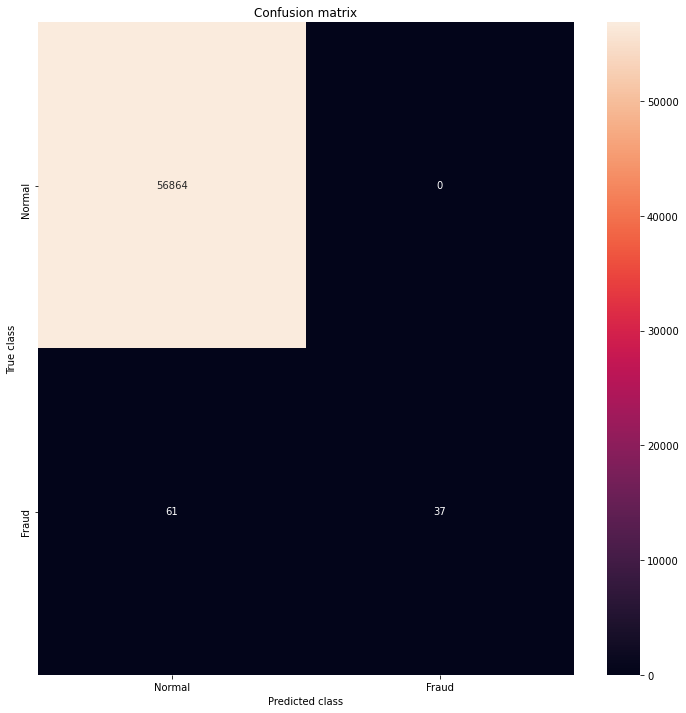

In [44]:
#Plot confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize =(12, 12))
sns.heatmap(confusion_matrix_svc, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [45]:
# Metrics
print("Evaluation of KNN Model")
print()
metrics(test_Y, predictions_svc.round())

Evaluation of KNN Model

Accuracy: 0.99893
Precision: 1.00000
Recall: 0.37755
F1-score: 0.54815


# 5. Result summary

In [46]:
models = pd.DataFrame({
    'Model': ['Decision Trees', 'Random Forest', 'Logistic regression', 'KNN', 'SVM', ],
    'Score (%)': [decision_tree_score, random_forest_score, lg_score, knn_score, svc_score],
    'Parameter':[decision_tree, random_forest, logreg, knn, svc]})

models.sort_values(by='Score (%)', ascending=False)

,Model,Score (%),Parameter
1,Random Forest,99.961378,"(DecisionTreeClassifier(max_features='auto', r..."
3,KNN,99.942067,"KNeighborsClassifier(algorithm='ball_tree', n_..."
0,Decision Trees,99.922756,DecisionTreeClassifier()
2,Logistic regression,99.908711,LogisticRegression()
4,SVM,99.890000,SVC(gamma='auto')


# Kết luận:

Từ việc tổng hợp các kết quả, cho thấy:
Thuật toán Random Forest, KNN và Decisions Trees cho độ chính xác xấp xỉ nhau và khá cao. Thấp hơn là các thuật toán Logistic regression và SVM.
Tuy nhiên, tất cả các thuật toán đều có độ chính xác lớn hơn 99%. 